In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Analytics & Data Science/Statistics for Business/Projek/Linear Reggression/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#Data Exploration & Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
data[data.duplicated()]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


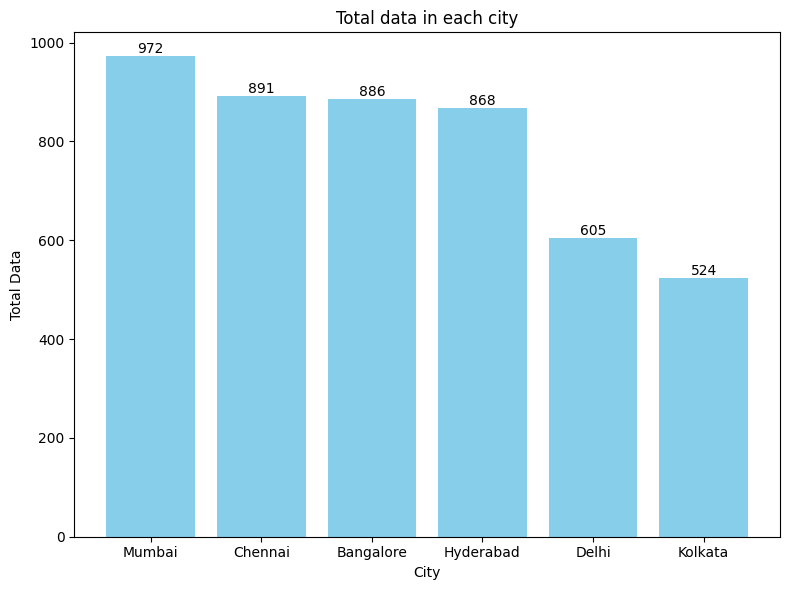

In [5]:
city_counts = data['City'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(city_counts.index, city_counts, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.title('Total data in each city')
plt.xlabel('City')
plt.ylabel('Total Data')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
kolkata_data = data[data['City'] == 'Kolkata']
mumbai_data = data[data['City'] == 'Mumbai']
bangalore_data = data[data['City'] == 'Bangalore']
delhi_data = data[data['City'] == 'Delhi']
chennai_data = data[data['City'] == 'Chennai']
hyderabad_data = data[data['City'] == 'Hyderabad']

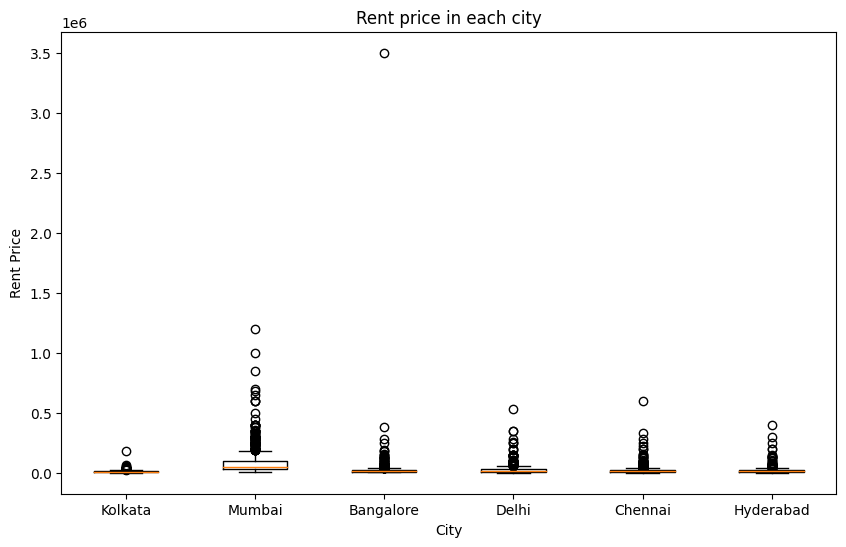

In [7]:
rent_data = [kolkata_data['Rent'], mumbai_data['Rent'], bangalore_data['Rent'],
            delhi_data['Rent'], chennai_data['Rent'], hyderabad_data['Rent']]

cities = ['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad']


plt.figure(figsize=(10, 6))
plt.boxplot(rent_data, labels=cities)
plt.title('Rent price in each city')
plt.xlabel('City')
plt.ylabel('Rent Price')
plt.show()

In [8]:
summary_data = pd.DataFrame({
    'Kolkata': kolkata_data['Rent'].describe(),
    'Mumbai': mumbai_data['Rent'].describe(),
    'Bangalore': bangalore_data['Rent'].describe(),
    'Delhi': delhi_data['Rent'].describe(),
    'Chennai': chennai_data['Rent'].describe(),
    'Hyderabad': hyderabad_data['Rent'].describe()
})

summary_data

,Kolkata,Mumbai,Bangalore,Delhi,Chennai,Hyderabad
count,524.000000,9.720000e+02,8.860000e+02,605.000000,891.000000,868.000000
mean,11645.173664,8.532120e+04,2.496637e+04,29461.983471,21614.092031,20555.048387
std,11137.494632,1.025251e+05,1.200562e+05,43542.047016,33069.910236,26436.196407
min,1500.000000,4.500000e+03,3.500000e+03,2000.000000,3000.000000,1200.000000
25%,6150.000000,3.200000e+04,9.500000e+03,11000.000000,10000.000000,10000.000000
50%,8500.000000,5.200000e+04,1.400000e+04,17000.000000,14000.000000,14000.000000
75%,14000.000000,9.500000e+04,2.100000e+04,30000.000000,21500.000000,22000.000000
max,180000.000000,1.200000e+06,3.500000e+06,530000.000000,600000.000000,400000.000000


In [9]:
bangalore_data[bangalore_data["Rent"] == bangalore_data["Rent"].max()]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent


In [10]:
data[data['Area Locality']=='Marathahalli']

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1655,2022-07-04,2,32900,1200,3 out of 6,Carpet Area,Marathahalli,Bangalore,Furnished,Bachelors/Family,1,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1892,2022-05-23,2,18000,600,Ground out of 2,Super Area,Marathahalli,Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
2059,2022-06-20,1,18000,550,3 out of 6,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Agent
2086,2022-05-23,2,10000,500,Upper Basement out of 4,Carpet Area,Marathahalli,Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner


In [11]:
bangalore_data[(bangalore_data['BHK']>=3) &
                (bangalore_data["Size"]>=2500) &
                (bangalore_data["Bathroom"]>=3) &
                (bangalore_data["Furnishing Status"] == "Semi-Furnished") &
                (bangalore_data["Area Type"] == "Carpet Area")]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1502,2022-07-09,4,61500,2608,1 out of 4,Carpet Area,Malleshwaram,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1620,2022-05-18,4,100000,3700,18 out of 22,Carpet Area,"Sanjeevini Nagar, Hegganahalli",Bangalore,Semi-Furnished,Bachelors/Family,5,Contact Agent
1718,2022-06-29,4,380000,3500,2 out of 4,Carpet Area,Lavelle Road,Bangalore,Semi-Furnished,Bachelors,5,Contact Agent
1810,2022-07-02,4,130000,4800,11 out of 19,Carpet Area,whitefield,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1935,2022-06-08,4,120000,4105,11 out of 25,Carpet Area,Hebbal,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent
2028,2022-07-06,4,130000,4341,9 out of 15,Carpet Area,Arakere,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent
2048,2022-05-31,4,250000,5700,24 out of 25,Carpet Area,whitefield,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent
2316,2022-07-06,3,85000,2600,8 out of 18,Carpet Area,Hebbal,Bangalore,Semi-Furnished,Family,4,Contact Agent
2371,2022-06-12,3,100000,2750,5 out of 9,Carpet Area,Prestige Acropolis,Bangalore,Semi-Furnished,Bachelors,4,Contact Agent


In [12]:
bangalore_data.drop(bangalore_data[bangalore_data['Rent'] == bangalore_data["Rent"].max()].index, inplace = True)

In [13]:
summary_data = pd.DataFrame({
    'Kolkata': kolkata_data['Rent'].describe(),
    'Mumbai': mumbai_data['Rent'].describe(),
    'Bangalore': bangalore_data['Rent'].describe(),
    'Delhi': delhi_data['Rent'].describe(),
    'Chennai': chennai_data['Rent'].describe(),
    'Hyderabad': hyderabad_data['Rent'].describe()
})

summary_data

,Kolkata,Mumbai,Bangalore,Delhi,Chennai,Hyderabad
count,524.000000,9.720000e+02,885.000000,605.000000,891.000000,868.000000
mean,11645.173664,8.532120e+04,21039.774011,29461.983471,21614.092031,20555.048387
std,11137.494632,1.025251e+05,27456.847512,43542.047016,33069.910236,26436.196407
min,1500.000000,4.500000e+03,3500.000000,2000.000000,3000.000000,1200.000000
25%,6150.000000,3.200000e+04,9500.000000,11000.000000,10000.000000,10000.000000
50%,8500.000000,5.200000e+04,14000.000000,17000.000000,14000.000000,14000.000000
75%,14000.000000,9.500000e+04,21000.000000,30000.000000,21500.000000,22000.000000
max,180000.000000,1.200000e+06,380000.000000,530000.000000,600000.000000,400000.000000


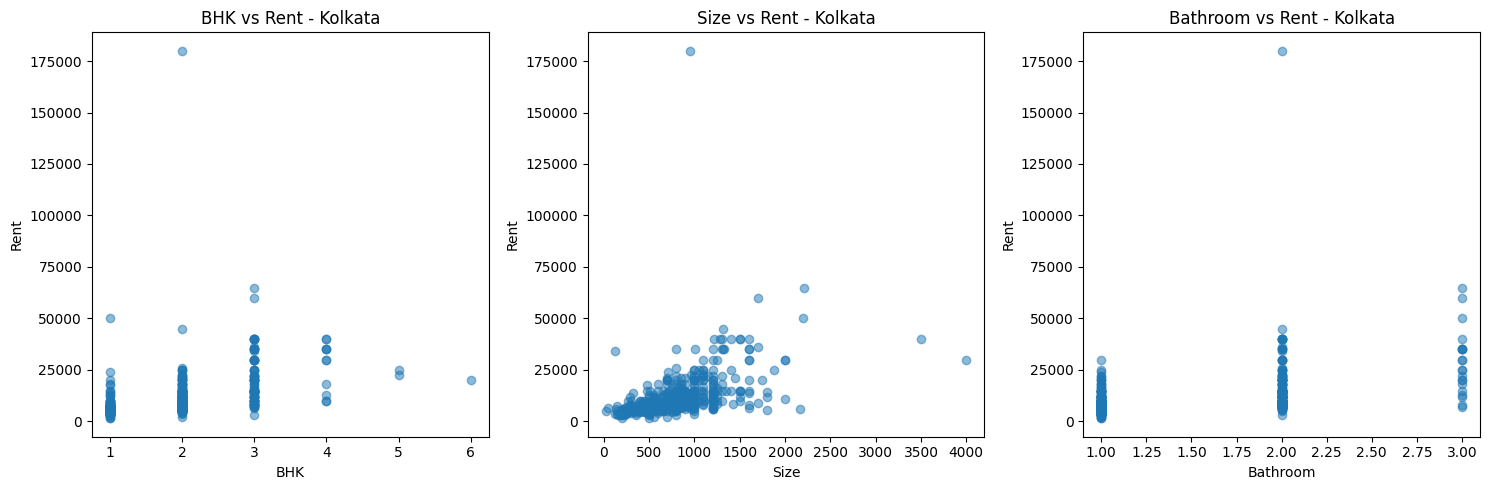

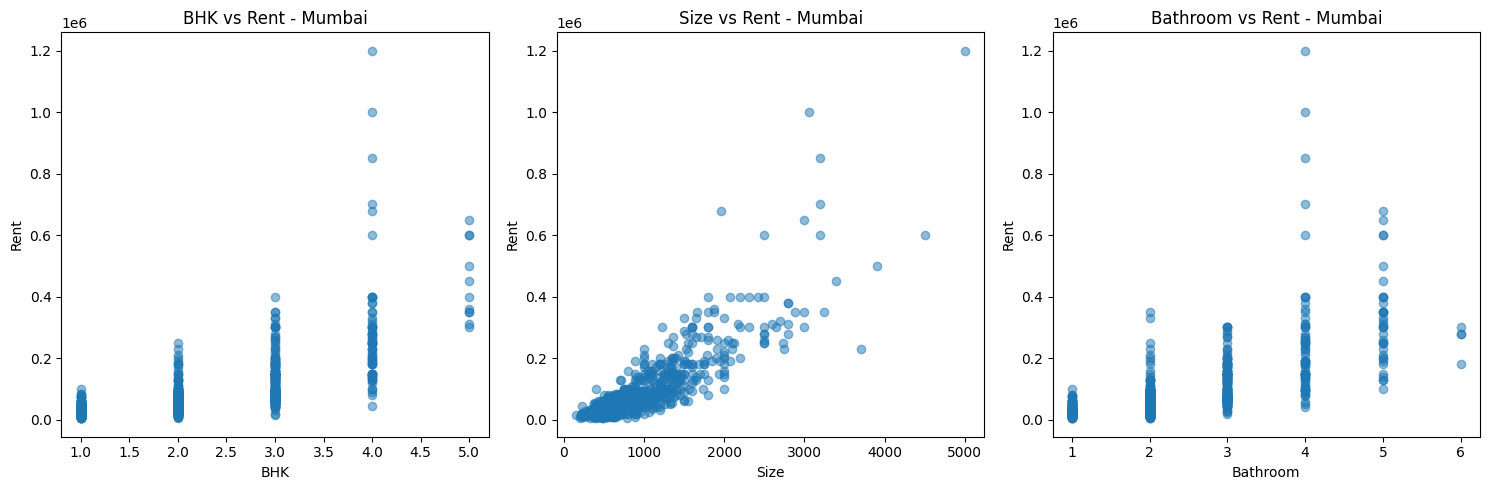

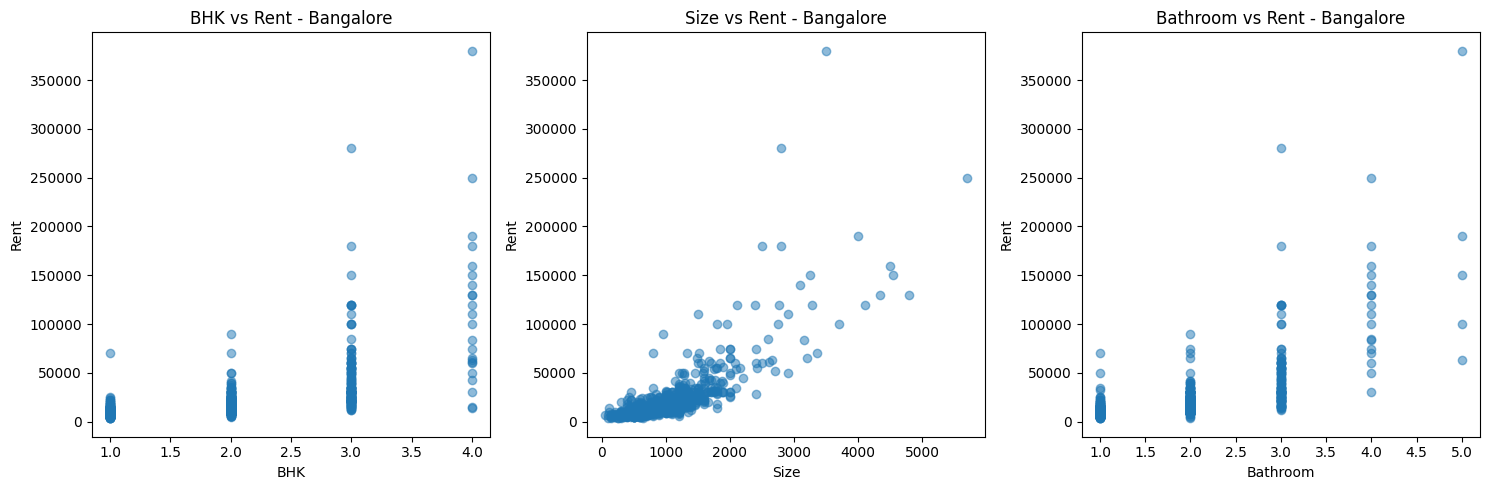

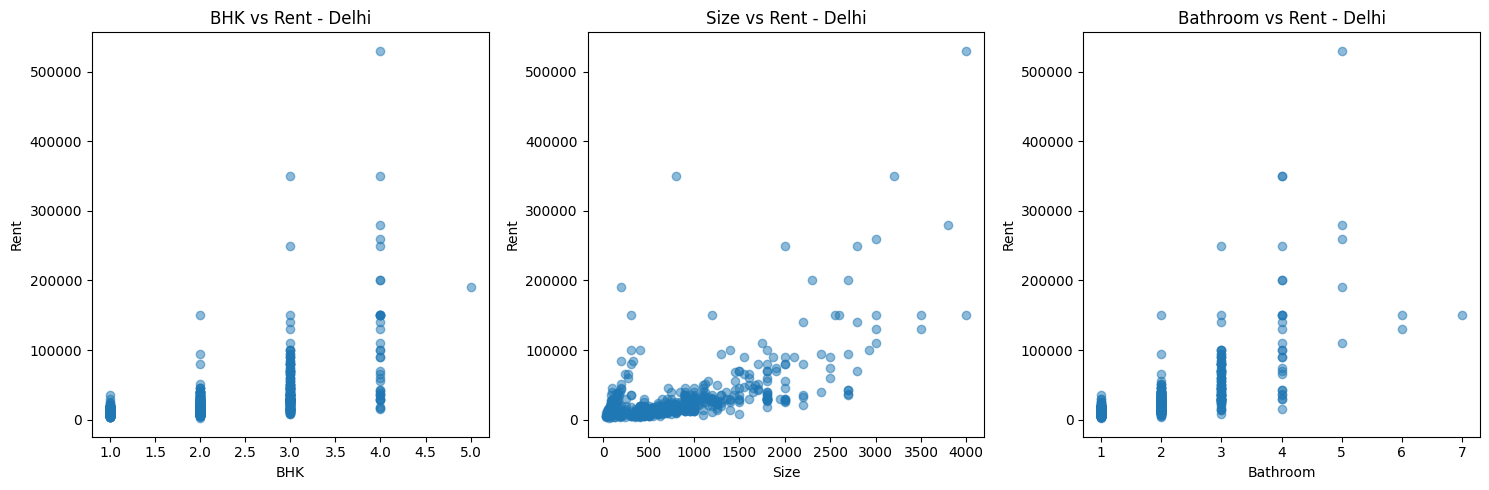

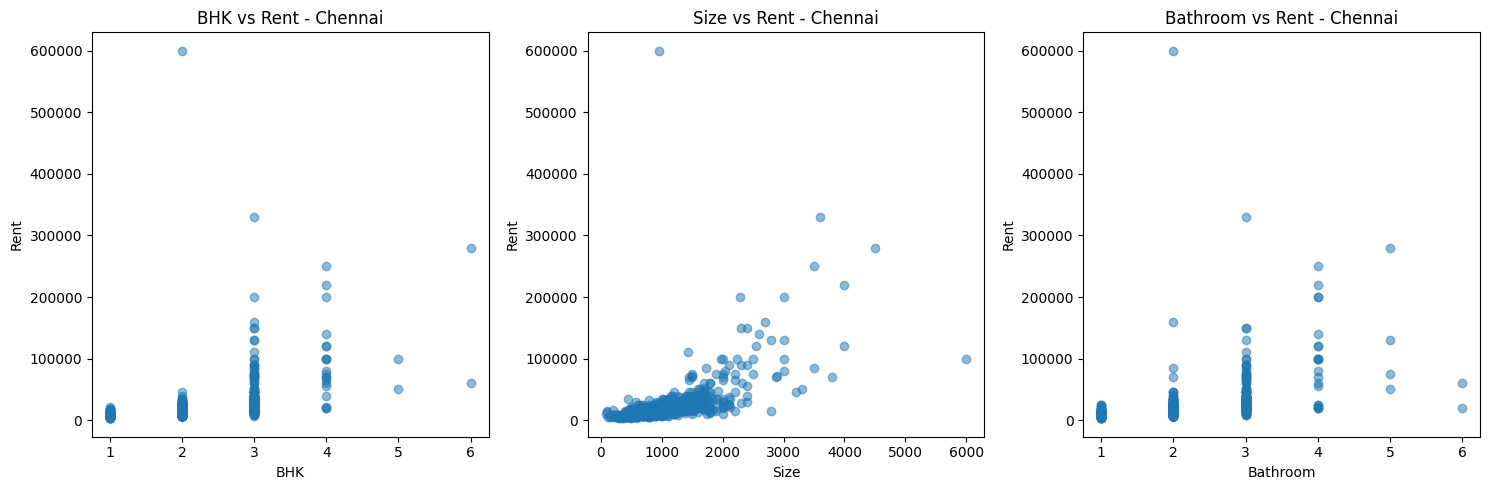

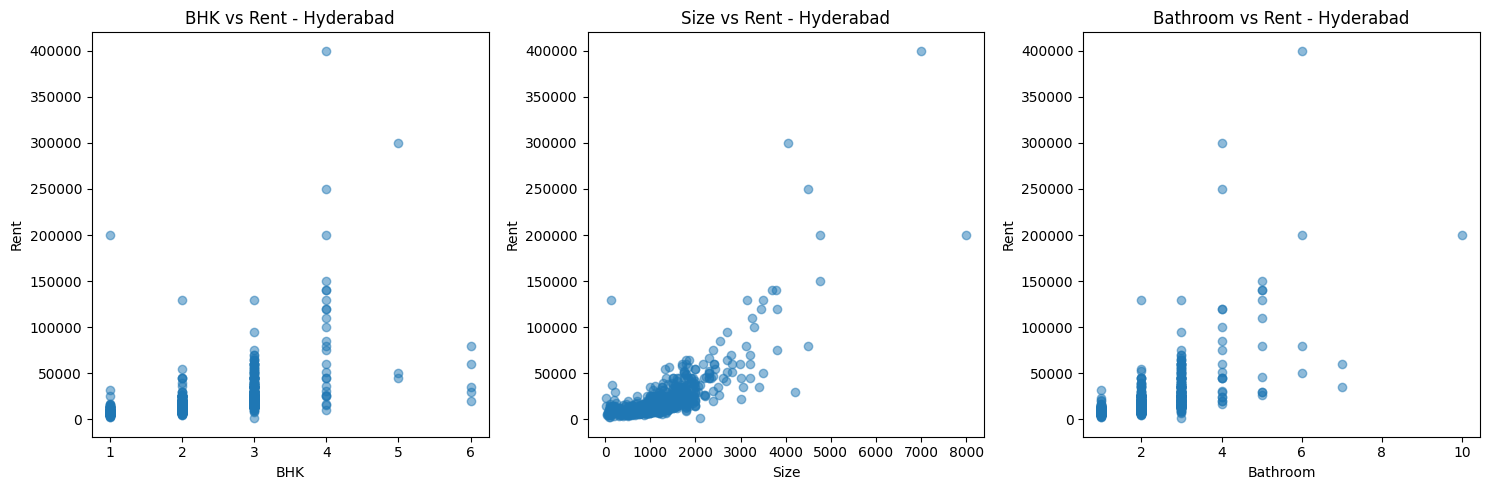

In [14]:
def plot_scatter(data, variables, city, length_size=15):
    total_subplot= len(variables)
    fig, axs = plt.subplots(1, total_subplot, figsize=(length_size, 5))


    position = 0
    for variable in variables:
      axs[position].scatter(data[variable], data['Rent'], alpha=0.5)
      axs[position].set_title(f'{variable} vs Rent - {city}')
      axs[position].set_xlabel(variable)
      axs[position].set_ylabel('Rent')

      position += 1

    plt.tight_layout()
    plt.show()


variables = ['BHK', 'Size', 'Bathroom']
plot_scatter(kolkata_data, variables, "Kolkata")
plot_scatter(mumbai_data, variables, 'Mumbai')
plot_scatter(bangalore_data, variables, "Bangalore")
plot_scatter(delhi_data, variables, "Delhi")
plot_scatter(chennai_data, variables, "Chennai")
plot_scatter(hyderabad_data, variables, "Hyderabad")


In [15]:
def correlation(data, city):
  print(f"Correlation - {city}")
  print(data[['BHK','Size', 'Bathroom', 'Rent']].corr(method='pearson'))
  print()

correlation(kolkata_data, "Kolkata")
correlation(mumbai_data, 'Mumbai')
correlation(bangalore_data, "Bangalore")
correlation(delhi_data, "Delhi")
correlation(chennai_data, "Chennai")
correlation(hyderabad_data, "Hyderabad")

Correlation - Kolkata
               BHK      Size  Bathroom      Rent
BHK       1.000000  0.630216  0.563131  0.412509
Size      0.630216  1.000000  0.545694  0.479700
Bathroom  0.563131  0.545694  1.000000  0.464213
Rent      0.412509  0.479700  0.464213  1.000000

Correlation - Mumbai
               BHK      Size  Bathroom      Rent
BHK       1.000000  0.853061  0.864901  0.676760
Size      0.853061  1.000000  0.828013  0.855164
Bathroom  0.864901  0.828013  1.000000  0.670810
Rent      0.676760  0.855164  0.670810  1.000000

Correlation - Bangalore
               BHK      Size  Bathroom      Rent
BHK       1.000000  0.789843  0.843870  0.566903
Size      0.789843  1.000000  0.811268  0.781822
Bathroom  0.843870  0.811268  1.000000  0.628831
Rent      0.566903  0.781822  0.628831  1.000000

Correlation - Delhi
               BHK      Size  Bathroom      Rent
BHK       1.000000  0.603971  0.802139  0.522406
Size      0.603971  1.000000  0.702010  0.621774
Bathroom  0.802139  0.702010

#Hypothesis Testing

In [16]:
from scipy import stats

In [17]:
variance_df = pd.DataFrame(columns=['City', 'Furnished Variance', 'Unfurnished Variance', 'Semi-Furnished Variance'])
data_dict = {"Kolkata" : kolkata_data,
             "Mumbai" : mumbai_data,
             "Bangalore": bangalore_data,
             "Delhi" : delhi_data,
             "Chennai": chennai_data,
             "Hyderabad": hyderabad_data}

for city in data_dict.keys():
  furnished = data[(data['Furnishing Status'] == 'Furnished') & (data['City'] == city)]['Rent'].var()
  semi_furnished = data[(data['Furnishing Status'] == 'Semi-Furnished') & (data['City'] == city)]['Rent'].var()
  unfurnished = data[(data['Furnishing Status'] == 'Unfurnished') & (data['City'] == city)]['Rent'].var()
  variance_df = variance_df.append({'City': city,
                                    'Furnished Variance': furnished,
                                    'Unfurnished Variance': unfurnished,
                                    'Semi-Furnished Variance': semi_furnished},
                                   ignore_index=True)


variance_df

,City,Furnished Variance,Unfurnished Variance,Semi-Furnished Variance
0,Kolkata,1.138840e+08,1.514296e+08,6.536162e+07
1,Mumbai,1.234509e+10,2.606715e+09,1.463007e+10
2,Bangalore,1.794026e+09,4.481151e+08,2.140234e+10
3,Delhi,1.149235e+09,1.323477e+09,2.593920e+09
4,Chennai,1.378228e+09,1.114849e+09,9.785135e+08
5,Hyderabad,3.602545e+08,4.332524e+08,9.716197e+08


In [18]:
def hypothesis_test(data):
  columns = ['City',
              'T-Statistic',
              'T-Critical',
              'P-Value',
              'Alpha',
              'Result comparison t_statistic and t_critical',
              'Result comparison p_value and alpha']

  hypothesis_test_furnish_unfurnish = pd.DataFrame(columns=columns)
  hypothesis_test_semifurnish_unfurnish = pd.DataFrame(columns=columns)

  for city in data.keys():
    data_city = data[city]
    furnished = data_city[data_city['Furnishing Status'] == 'Furnished']['Rent']
    semi_furnished = data_city[data_city['Furnishing Status'] == 'Semi-Furnished']['Rent']
    unfurnished = data_city[data_city['Furnishing Status'] == 'Unfurnished']['Rent']

    furnished_unfurnished_stat = calculation_hypothesis_test(furnished, unfurnished)
    result_furnished_unfurnished = comparison(furnished_unfurnished_stat)
    hypothesis_test_furnish_unfurnish = hypothesis_test_furnish_unfurnish.append({'City': city,
                                                                                  **furnished_unfurnished_stat,
                                                                                  **result_furnished_unfurnished},
                                                                              ignore_index=True)


    semifurnished_unfurnished_stat = calculation_hypothesis_test(semi_furnished, unfurnished)
    result_semifurnished_unfurnished = comparison(semifurnished_unfurnished_stat)
    hypothesis_test_semifurnish_unfurnish = hypothesis_test_semifurnish_unfurnish.append({'City': city,
                                                                                  **semifurnished_unfurnished_stat,
                                                                                  **result_semifurnished_unfurnished},
                                                                              ignore_index=True)

  return hypothesis_test_furnish_unfurnish, hypothesis_test_semifurnish_unfurnish

def calculation_hypothesis_test(sample_1, sample_2, alpha=0.05):
  t_statistic, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False, alternative='greater')

  df = (sample_1.var()/len(sample_1) + sample_2.var()/len(sample_2))**2 / ((sample_1.var()/len(sample_1))**2 / (len(sample_1)-1) + (sample_2.var()/len(sample_2))**2 / (len(sample_2)-1))
  t_critical = stats.t.ppf(1 - alpha, df)
  return {'T-Statistic': t_statistic,
          'P-Value': p_value,
          'T-Critical': t_critical,
          'Alpha': alpha}

def comparison(data):
  if data['T-Statistic'] > data['T-Critical']:
        result_tstat_tcrit = "Hipotesis Nol (H0) Ditolak"
  else:
        result_tstat_tcrit = "Hipotesis Nol (H0) Gagal Ditolak"

  if data['P-Value'] < data['Alpha']:
        result_pvalue_alpha = "Hipotesis Nol (H0) Ditolak"
  else:
        result_pvalue_alpha = "Hipotesis Nol (H0) Gagal Ditolak"

  return {
      'Result comparison t_statistic and t_critical': result_tstat_tcrit,
      'Result comparison p_value and alpha': result_pvalue_alpha
  }


In [19]:
furnish_unfurnish, semifurnish_unfurnish = hypothesis_test(data_dict)

##First Hypothesis Test
$H_0$: $\mu_{\text{furnished}} = \mu_{\text{unfurnished}}$
<br>
$H_1$: $\mu_{\text{furnished}} > \mu_{\text{unfurnished}}$

In [20]:
furnish_unfurnish

,City,T-Statistic,T-Critical,P-Value,Alpha,Result comparison t_statistic and t_critical,Result comparison p_value and alpha
0,Kolkata,1.750216,1.661397,4.168891e-02,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
1,Mumbai,7.462517,1.649785,4.316287e-13,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
2,Bangalore,3.450207,1.658838,3.978188e-04,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
3,Delhi,1.546616,1.652794,6.179776e-02,0.05,Hipotesis Nol (H0) Gagal Ditolak,Hipotesis Nol (H0) Gagal Ditolak
4,Chennai,3.729060,1.658725,1.523354e-04,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
5,Hyderabad,4.742330,1.652527,2.008041e-06,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak


##Second Hypothesis Test
$H_0$: $\mu_{\text{semi-furnished}} = \mu_{\text{unfurnished}}$
<br>
$H_1$: $\mu_{\text{semi-furnished}} > \mu_{\text{unfurnished}}$

In [21]:
semifurnish_unfurnish

,City,T-Statistic,T-Critical,P-Value,Alpha,Result comparison t_statistic and t_critical,Result comparison p_value and alpha
0,Kolkata,0.552639,1.648718,2.904115e-01,0.05,Hipotesis Nol (H0) Gagal Ditolak,Hipotesis Nol (H0) Gagal Ditolak
1,Mumbai,7.230096,1.647622,8.098614e-13,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
2,Bangalore,2.489987,1.648219,6.565859e-03,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
3,Delhi,2.631272,1.647932,4.385727e-03,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
4,Chennai,3.336631,1.646888,4.448911e-04,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak
5,Hyderabad,5.595219,1.647019,1.577850e-08,0.05,Hipotesis Nol (H0) Ditolak,Hipotesis Nol (H0) Ditolak


#Modelling

In [22]:
import statsmodels.formula.api as smf

In [23]:
def print_coef_std_err(results):
    coef = results.params
    std_err = results.bse
    t_values = results.tvalues
    p_values = results.pvalues

    df = pd.DataFrame({
        "coef": np.round(coef, 2),
        "std err": np.round(std_err, 2),
        "t-value": np.round(t_values, 2),
        "P>|t|": np.round(p_values, 2)
    })

    return df

def linear_regression_model(formula, data):
    model = smf.ols(formula, data)
    results = model.fit()

    results_df = print_coef_std_err(results)
    r_squared = round(results.rsquared, 2)
    adj_r_squared = round(results.rsquared_adj, 2)

    return [results_df, r_squared, adj_r_squared, results]

## One predictor

In [24]:
formula_one_pred = "Rent ~ Size"
data_dict = {"Kolkata" : kolkata_data,
             "Mumbai" : mumbai_data,
             "Bangalore": bangalore_data,
             "Delhi" : delhi_data,
             "Chennai": chennai_data,
             "Hyderabad": hyderabad_data}

one_pred_results = {}

for city in data_dict.keys():
  results = linear_regression_model(formula_one_pred, data_dict[city])
  one_pred_results[city] = results

for city in one_pred_results.keys():
  print(city)
  print(one_pred_results[city][0])
  print(f"R-Squared: {one_pred_results[city][1]}")
  print(f"Adjusted R-Squared: {one_pred_results[city][2]}")
  print()

Kolkata
              coef  std err  t-value  P>|t|
Intercept  1616.59   909.51     1.78   0.08
Size         12.74     1.02    12.49   0.00
R-Squared: 0.23
Adjusted R-Squared: 0.23

Mumbai
               coef  std err  t-value  P>|t|
Intercept -54302.25  3208.26   -16.93    0.0
Size         154.13     3.00    51.38    0.0
R-Squared: 0.73
Adjusted R-Squared: 0.73

Bangalore
               coef  std err  t-value  P>|t|
Intercept -13203.04  1084.48   -12.17    0.0
Size          34.79     0.93    37.26    0.0
R-Squared: 0.61
Adjusted R-Squared: 0.61

Delhi
             coef  std err  t-value  P>|t|
Intercept -652.08  2076.43    -0.31   0.75
Size        38.29     1.96    19.49   0.00
R-Squared: 0.39
Adjusted R-Squared: 0.39

Chennai
               coef  std err  t-value  P>|t|
Intercept -13577.25  1832.30    -7.41    0.0
Size          34.11     1.55    21.99    0.0
R-Squared: 0.35
Adjusted R-Squared: 0.35

Hyderabad
               coef  std err  t-value  P>|t|
Intercept -11276.18  1107.22  

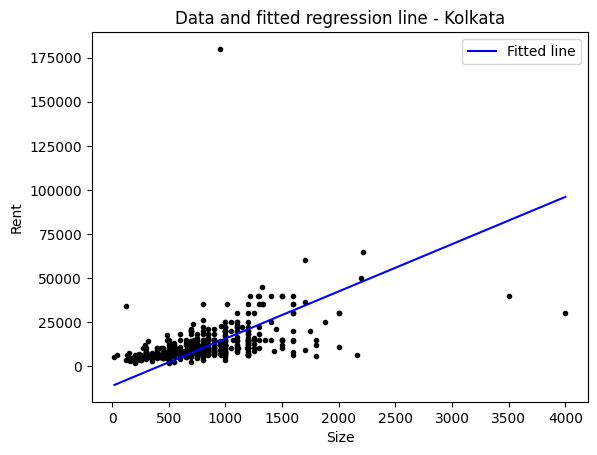

In [26]:
plt.scatter(data_dict["Kolkata"]["Size"], data_dict["Kolkata"]["Rent"], color = "k", marker=".")

data = one_pred_results[city][0]
a_hat = data["coef"]["Intercept"]
b_hat = data["coef"]["Size"]

x_domain = np.linspace(np.min(data_dict["Kolkata"]["Size"]), np.max(data_dict["Kolkata"]["Size"]), 10000)
fitted_values = a_hat + b_hat * x_domain
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

plt.legend()
plt.ylabel("Rent")
plt.xlabel("Size")

plt.title(f"Data and fitted regression line - Kolkata")

plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted rent')

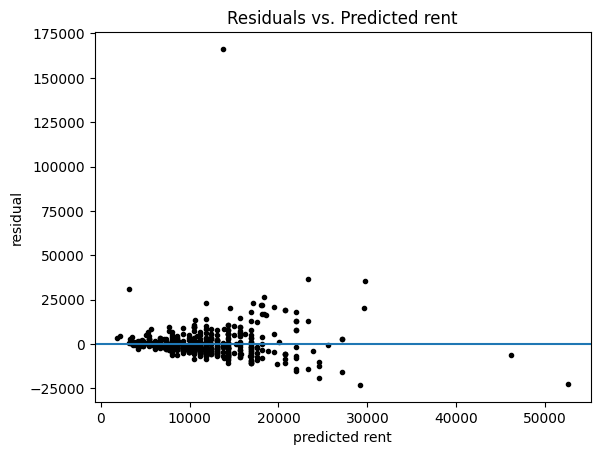

In [27]:
plt.scatter(one_pred_results["Kolkata"][3].fittedvalues, one_pred_results["Kolkata"][3].resid, marker=".", c = "k")

plt.axhline([0])

plt.xlabel("predicted rent")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted rent")

##Two predictor

In [28]:
kolkata_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)
mumbai_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)
bangalore_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)
delhi_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)
chennai_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)
hyderabad_data.rename(columns = {'Furnishing Status':'furnishing_status'}, inplace = True)

In [29]:
formula_two_pred = "Rent ~ Size + furnishing_status"
two_pred_results = {}

for city in data_dict.keys():
  results = linear_regression_model(formula_two_pred, data_dict[city])
  two_pred_results[city] = results

for city in two_pred_results.keys():
  print(city)
  print(two_pred_results[city][0])
  print(f"R-Squared: {two_pred_results[city][1]}")
  print(f"Adjusted R-Squared: {one_pred_results[city][2]}")
  print()

Kolkata
                                        coef  std err  t-value  P>|t|
Intercept                            3761.98  1489.69     2.53   0.01
furnishing_status[T.Semi-Furnished] -2547.03  1495.86    -1.70   0.09
furnishing_status[T.Unfurnished]    -2376.29  1364.69    -1.74   0.08
Size                                   12.74     1.02    12.49   0.00
R-Squared: 0.24
Adjusted R-Squared: 0.23

Mumbai
                                         coef  std err  t-value  P>|t|
Intercept                           -46344.82  4648.04    -9.97   0.00
furnishing_status[T.Semi-Furnished]  -4640.93  4341.04    -1.07   0.29
furnishing_status[T.Unfurnished]    -12489.24  4576.98    -2.73   0.01
Size                                   152.20     3.07    49.50   0.00
R-Squared: 0.73
Adjusted R-Squared: 0.73

Bangalore
                                        coef  std err  t-value  P>|t|
Intercept                           -9130.65  2118.50    -4.31   0.00
furnishing_status[T.Semi-Furnished] -5056.91  

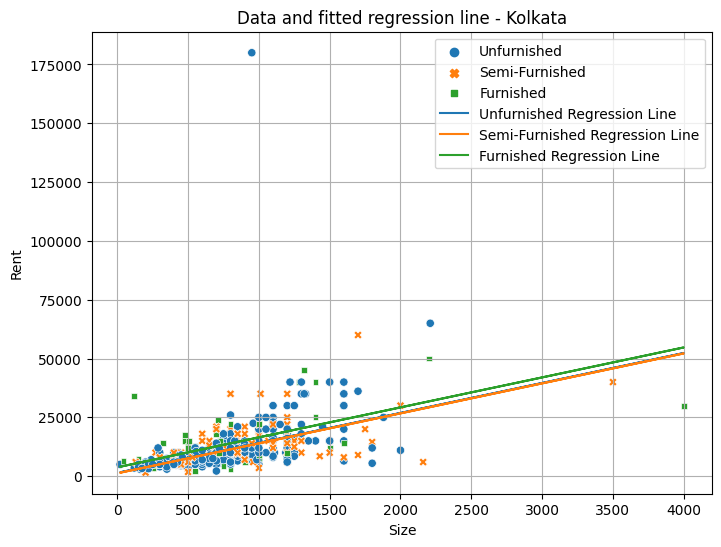

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=kolkata_data, x='Size', y='Rent', hue='furnishing_status', style='furnishing_status')

for status in kolkata_data['furnishing_status'].unique():
    subset = kolkata_data[kolkata_data['furnishing_status'] == status]
    coef = 0

    if status == 'Furnished':
        coef = 0
    elif status == 'Semi-Furnished':
        coef = -2547.03
    elif status == 'Unfurnished':
        coef = -2376.29

    line = lambda x: 3761.98 + coef + 12.74 * x
    plt.plot(kolkata_data['Size'], line(kolkata_data['Size']), label=f'{status} Regression Line')


plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Data and fitted regression line - Kolkata')


plt.legend()

plt.grid(True)
plt.show()

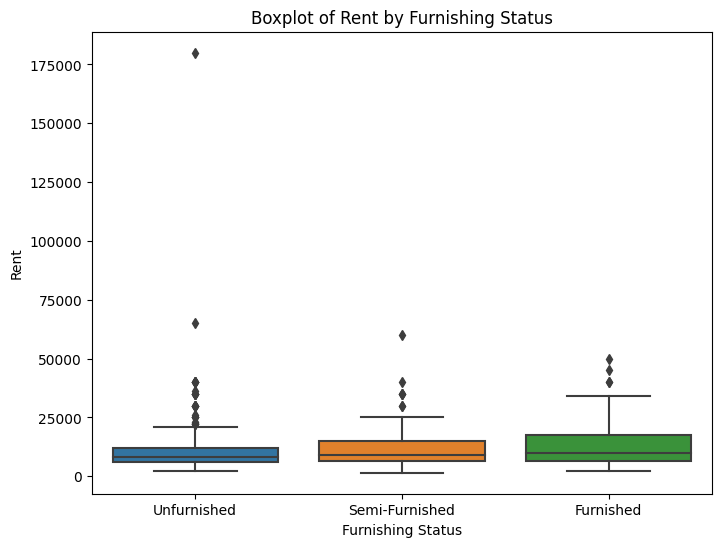

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=kolkata_data, x='furnishing_status', y='Rent')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')
plt.title('Boxplot of Rent by Furnishing Status')

plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted rent')

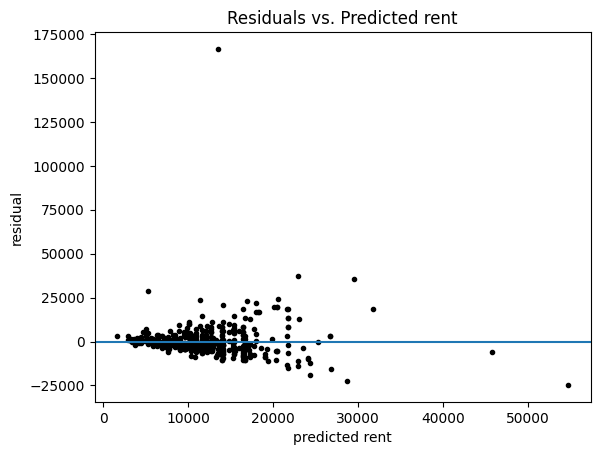

In [33]:
plt.scatter(two_pred_results["Kolkata"][3].fittedvalues, two_pred_results["Kolkata"][3].resid, marker=".", c = "k")


plt.axhline([0])

plt.xlabel("predicted rent")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted rent")

##Two Predictor with interaction

In [34]:
formula_two_pred_interaction = "Rent ~ Size + furnishing_status + furnishing_status:Size"
two_pred_interaction_results = {}

for city in data_dict.keys():
  results = linear_regression_model(formula_two_pred_interaction, data_dict[city])
  two_pred_interaction_results[city] = results

for city in two_pred_interaction_results.keys():
  print(city)
  print(two_pred_interaction_results[city][0])
  print(f"R-Squared: {two_pred_interaction_results[city][1]}")
  print(f"Adjusted R-Squared: {one_pred_results[city][2]}")
  print()

Kolkata
                                             coef  std err  t-value  P>|t|
Intercept                                 6155.21  2093.12     2.94   0.00
furnishing_status[T.Semi-Furnished]      -3176.66  2701.34    -1.18   0.24
furnishing_status[T.Unfurnished]         -7039.68  2450.00    -2.87   0.00
Size                                         9.72     2.12     4.58   0.00
furnishing_status[T.Semi-Furnished]:Size     0.88     2.79     0.31   0.75
furnishing_status[T.Unfurnished]:Size        5.97     2.60     2.30   0.02
R-Squared: 0.25
Adjusted R-Squared: 0.23

Mumbai
                                              coef  std err  t-value  P>|t|
Intercept                                -41399.68  6211.83    -6.66   0.00
furnishing_status[T.Semi-Furnished]      -33347.94  7966.88    -4.19   0.00
furnishing_status[T.Unfurnished]          16328.48  8278.88     1.97   0.05
Size                                        147.35     5.16    28.55   0.00
furnishing_status[T.Semi-Furnished]:Si

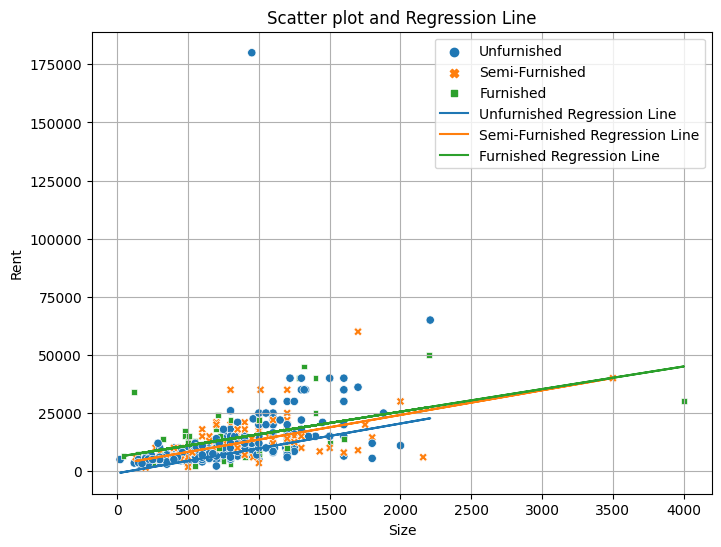

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=kolkata_data, x='Size', y='Rent', hue='furnishing_status', style='furnishing_status')

for status in kolkata_data['furnishing_status'].unique():
    subset = kolkata_data[kolkata_data['furnishing_status'] == status]
    coef = 0

    if status == 'Furnished':
        coef = 0
        line = lambda x: 6155.21 + coef + 9.72 * x
        plt.plot(subset['Size'], line(subset['Size']), label=f'{status} Regression Line')
    elif status == 'Semi-Furnished':
        coef1 = -3176.66
        coef2 = 0.88
        line = lambda x: 6155.21 + coef1 + 9.72 * x + coef2 * x
        plt.plot(subset['Size'], line(subset['Size']), label=f'{status} Regression Line')
    elif status == 'Unfurnished':
        coef1 = -7039.68
        coef2 = 0.97
        line = lambda x: 6155.21 + coef1 + 9.72 * x + coef2 * x
        plt.plot(subset['Size'], line(subset['Size']), label=f'{status} Regression Line')


plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Scatter plot and Regression Line')


plt.legend()

plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted rent')

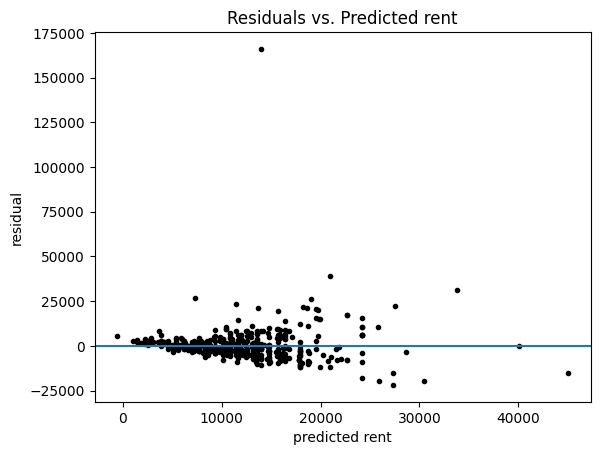

In [36]:
plt.scatter(two_pred_interaction_results["Kolkata"][3].fittedvalues, two_pred_interaction_results["Kolkata"][3].resid, marker=".", c = "k")

plt.axhline([0])

plt.xlabel("predicted rent")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted rent")

##Two predictor with transformation

In [37]:
kolkata_data['Rent_K'] = kolkata_data['Rent'] / 1000
mumbai_data['Rent_K'] = mumbai_data['Rent'] / 1000
bangalore_data['Rent_K'] = bangalore_data['Rent'] / 1000
delhi_data['Rent_K'] = delhi_data['Rent'] / 1000
chennai_data['Rent_K'] = chennai_data['Rent'] / 1000
hyderabad_data['Rent_K'] = hyderabad_data['Rent'] / 1000

In [38]:
kolkata_data['z_size'] = (kolkata_data['Size'] - np.mean(kolkata_data['Size'])) / np.std(kolkata_data['Size'])
mumbai_data['z_size'] = (mumbai_data['Size'] - np.mean(mumbai_data['Size'])) / np.std(mumbai_data['Size'])
bangalore_data['z_size'] = (bangalore_data['Size'] - np.mean(bangalore_data['Size'])) / np.std(bangalore_data['Size'])
delhi_data['z_size'] = (delhi_data['Size'] - np.mean(delhi_data['Size'])) / np.std(delhi_data['Size'])
chennai_data['z_size'] = (chennai_data['Size'] - np.mean(chennai_data['Size'])) / np.std(chennai_data['Size'])
hyderabad_data['z_size'] = (hyderabad_data['Size'] - np.mean(hyderabad_data['Size'])) / np.std(hyderabad_data['Size'])

In [39]:
formula_two_pred_transform = "Rent_K~ z_size + furnishing_status"
data_dict = {"Kolkata" : kolkata_data,
             "Mumbai" : mumbai_data,
             "Bangalore": bangalore_data,
             "Delhi" : delhi_data,
             "Chennai": chennai_data,
             "Hyderabad": hyderabad_data}

two_pred_transform_results = {}

for city in data_dict.keys():
  results = linear_regression_model(formula_two_pred_transform, data_dict[city])
  two_pred_transform_results[city] = results

for city in two_pred_transform_results.keys():
  print(city)
  print(two_pred_transform_results[city][0])
  print(f"R-Squared: {two_pred_transform_results[city][1]}")
  print(f"Adjusted R-Squared: {one_pred_results[city][2]}")
  print()

Kolkata
                                      coef  std err  t-value  P>|t|
Intercept                            13.79     1.25    11.03   0.00
furnishing_status[T.Semi-Furnished]  -2.55     1.50    -1.70   0.09
furnishing_status[T.Unfurnished]     -2.38     1.36    -1.74   0.08
z_size                                5.34     0.43    12.49   0.00
R-Squared: 0.24
Adjusted R-Squared: 0.23

Mumbai
                                      coef  std err  t-value  P>|t|
Intercept                            91.53     3.45    26.55   0.00
furnishing_status[T.Semi-Furnished]  -4.64     4.34    -1.07   0.29
furnishing_status[T.Unfurnished]    -12.49     4.58    -2.73   0.01
z_size                               86.54     1.75    49.50   0.00
R-Squared: 0.73
Adjusted R-Squared: 0.73

Bangalore
                                      coef  std err  t-value  P>|t|
Intercept                            25.05     1.80    13.91   0.00
furnishing_status[T.Semi-Furnished]  -5.06     1.93    -2.62   0.01
furnish

In [40]:
two_pred_transform_results["Kolkata"][3]

Text(0.5, 1.0, 'Residuals vs. Predicted rent')

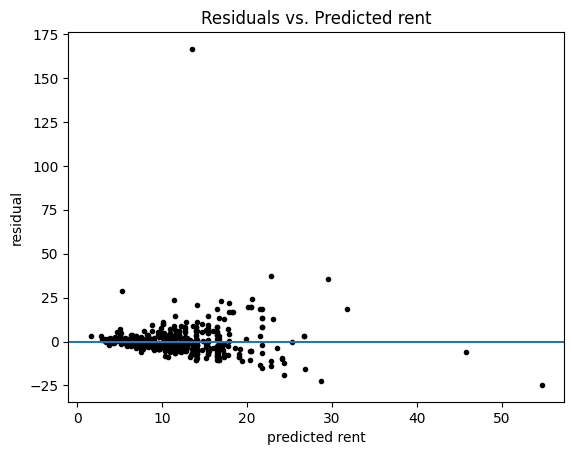

In [41]:
plt.scatter(two_pred_transform_results["Kolkata"][3].fittedvalues, two_pred_transform_results["Kolkata"][3].resid, marker=".", c = "k")

plt.axhline([0])

plt.xlabel("predicted rent")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted rent")